### Задание 1
взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

#### in-vehicle coupon recommendation Data Set

https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

Data Set Information:

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper: 
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.

In [1]:
import numpy as np
import pandas as pd

filename = 'in-vehicle-coupon-recommendation.csv'

### Задание 2
сделать обзорный анализ выбранного датасета

In [2]:
df = pd.read_csv(filename)
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
df.car.value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

In [6]:
df.Bar.value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [7]:
df.CoffeeHouse.value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [8]:
df.drop(columns=['car']).dropna().describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

### Задание 3
сделать feature engineering

По признаку car слишком мало данных, по остальным признакам - пропусков не так много. Для упрощения, дропаем car и пропуски в остальных признаках.

In [10]:
df = df.drop(columns=['car']).dropna()

In [11]:
target = 'Y'
features = df.drop(columns=[target]).columns.to_list()

Планируется использовать CatBoost. Все признаки - категориальные. Дополнительный feature engineering не требуется.

### Задание 4
обучить любой классификатор (какой вам нравится)

In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [13]:
random_state = 20

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

model = CatBoostClassifier(cat_features=features, random_state=random_state)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

Learning rate set to 0.0264
0:	learn: 0.6882513	total: 80.8ms	remaining: 1m 20s
1:	learn: 0.6837877	total: 102ms	remaining: 50.7s
2:	learn: 0.6791206	total: 121ms	remaining: 40.1s
3:	learn: 0.6741288	total: 142ms	remaining: 35.3s
4:	learn: 0.6699514	total: 163ms	remaining: 32.5s
5:	learn: 0.6658926	total: 180ms	remaining: 29.8s
6:	learn: 0.6622566	total: 200ms	remaining: 28.3s
7:	learn: 0.6582696	total: 215ms	remaining: 26.6s
8:	learn: 0.6546054	total: 231ms	remaining: 25.5s
9:	learn: 0.6511273	total: 246ms	remaining: 24.3s
10:	learn: 0.6480985	total: 259ms	remaining: 23.3s
11:	learn: 0.6445436	total: 271ms	remaining: 22.3s
12:	learn: 0.6412526	total: 285ms	remaining: 21.6s
13:	learn: 0.6386346	total: 298ms	remaining: 21s
14:	learn: 0.6357215	total: 314ms	remaining: 20.6s
15:	learn: 0.6332223	total: 329ms	remaining: 20.2s
16:	learn: 0.6307837	total: 343ms	remaining: 19.8s
17:	learn: 0.6281469	total: 356ms	remaining: 19.4s
18:	learn: 0.6260907	total: 369ms	remaining: 19.1s
19:	learn: 0.

175:	learn: 0.5360199	total: 2.47s	remaining: 11.6s
176:	learn: 0.5356526	total: 2.49s	remaining: 11.6s
177:	learn: 0.5354018	total: 2.5s	remaining: 11.6s
178:	learn: 0.5353719	total: 2.51s	remaining: 11.5s
179:	learn: 0.5351945	total: 2.52s	remaining: 11.5s
180:	learn: 0.5345537	total: 2.53s	remaining: 11.5s
181:	learn: 0.5343426	total: 2.54s	remaining: 11.4s
182:	learn: 0.5341166	total: 2.56s	remaining: 11.4s
183:	learn: 0.5339534	total: 2.57s	remaining: 11.4s
184:	learn: 0.5337757	total: 2.58s	remaining: 11.4s
185:	learn: 0.5335494	total: 2.59s	remaining: 11.3s
186:	learn: 0.5333775	total: 2.6s	remaining: 11.3s
187:	learn: 0.5332037	total: 2.62s	remaining: 11.3s
188:	learn: 0.5328461	total: 2.63s	remaining: 11.3s
189:	learn: 0.5325110	total: 2.64s	remaining: 11.3s
190:	learn: 0.5322650	total: 2.65s	remaining: 11.2s
191:	learn: 0.5320079	total: 2.67s	remaining: 11.2s
192:	learn: 0.5316974	total: 2.68s	remaining: 11.2s
193:	learn: 0.5312871	total: 2.69s	remaining: 11.2s
194:	learn: 0.

346:	learn: 0.5025072	total: 4.53s	remaining: 8.53s
347:	learn: 0.5020946	total: 4.54s	remaining: 8.52s
348:	learn: 0.5017491	total: 4.56s	remaining: 8.5s
349:	learn: 0.5013280	total: 4.57s	remaining: 8.49s
350:	learn: 0.5010608	total: 4.58s	remaining: 8.47s
351:	learn: 0.5008868	total: 4.59s	remaining: 8.46s
352:	learn: 0.5007835	total: 4.61s	remaining: 8.45s
353:	learn: 0.5006308	total: 4.62s	remaining: 8.43s
354:	learn: 0.5003172	total: 4.63s	remaining: 8.41s
355:	learn: 0.5001233	total: 4.64s	remaining: 8.4s
356:	learn: 0.5000377	total: 4.65s	remaining: 8.38s
357:	learn: 0.4997842	total: 4.67s	remaining: 8.37s
358:	learn: 0.4994592	total: 4.68s	remaining: 8.35s
359:	learn: 0.4993793	total: 4.69s	remaining: 8.34s
360:	learn: 0.4991940	total: 4.7s	remaining: 8.32s
361:	learn: 0.4989270	total: 4.71s	remaining: 8.31s
362:	learn: 0.4988126	total: 4.72s	remaining: 8.29s
363:	learn: 0.4987521	total: 4.74s	remaining: 8.28s
364:	learn: 0.4986521	total: 4.75s	remaining: 8.27s
365:	learn: 0.4

515:	learn: 0.4746379	total: 6.61s	remaining: 6.2s
516:	learn: 0.4745176	total: 6.62s	remaining: 6.18s
517:	learn: 0.4743034	total: 6.63s	remaining: 6.17s
518:	learn: 0.4741629	total: 6.65s	remaining: 6.16s
519:	learn: 0.4739856	total: 6.66s	remaining: 6.15s
520:	learn: 0.4739560	total: 6.67s	remaining: 6.13s
521:	learn: 0.4738232	total: 6.68s	remaining: 6.12s
522:	learn: 0.4737477	total: 6.7s	remaining: 6.11s
523:	learn: 0.4735422	total: 6.71s	remaining: 6.09s
524:	learn: 0.4733928	total: 6.72s	remaining: 6.08s
525:	learn: 0.4731226	total: 6.73s	remaining: 6.07s
526:	learn: 0.4729272	total: 6.75s	remaining: 6.05s
527:	learn: 0.4728184	total: 6.76s	remaining: 6.04s
528:	learn: 0.4725879	total: 6.77s	remaining: 6.03s
529:	learn: 0.4724199	total: 6.79s	remaining: 6.02s
530:	learn: 0.4723050	total: 6.8s	remaining: 6s
531:	learn: 0.4721802	total: 6.81s	remaining: 5.99s
532:	learn: 0.4718476	total: 6.83s	remaining: 5.98s
533:	learn: 0.4716244	total: 6.84s	remaining: 5.97s
534:	learn: 0.4714

682:	learn: 0.4547100	total: 9.26s	remaining: 4.3s
683:	learn: 0.4546181	total: 9.28s	remaining: 4.29s
684:	learn: 0.4545116	total: 9.29s	remaining: 4.27s
685:	learn: 0.4544613	total: 9.31s	remaining: 4.26s
686:	learn: 0.4543946	total: 9.33s	remaining: 4.25s
687:	learn: 0.4543226	total: 9.35s	remaining: 4.24s
688:	learn: 0.4541940	total: 9.37s	remaining: 4.23s
689:	learn: 0.4540740	total: 9.38s	remaining: 4.22s
690:	learn: 0.4540213	total: 9.4s	remaining: 4.2s
691:	learn: 0.4539799	total: 9.42s	remaining: 4.19s
692:	learn: 0.4539107	total: 9.43s	remaining: 4.18s
693:	learn: 0.4538057	total: 9.45s	remaining: 4.17s
694:	learn: 0.4536813	total: 9.46s	remaining: 4.15s
695:	learn: 0.4536138	total: 9.48s	remaining: 4.14s
696:	learn: 0.4535233	total: 9.5s	remaining: 4.13s
697:	learn: 0.4534304	total: 9.51s	remaining: 4.12s
698:	learn: 0.4533669	total: 9.53s	remaining: 4.1s
699:	learn: 0.4532735	total: 9.54s	remaining: 4.09s
700:	learn: 0.4530412	total: 9.56s	remaining: 4.08s
701:	learn: 0.452

849:	learn: 0.4378245	total: 11.9s	remaining: 2.1s
850:	learn: 0.4377554	total: 11.9s	remaining: 2.09s
851:	learn: 0.4376462	total: 11.9s	remaining: 2.07s
852:	learn: 0.4375599	total: 11.9s	remaining: 2.06s
853:	learn: 0.4375007	total: 12s	remaining: 2.04s
854:	learn: 0.4374426	total: 12s	remaining: 2.03s
855:	learn: 0.4373562	total: 12s	remaining: 2.02s
856:	learn: 0.4373001	total: 12s	remaining: 2s
857:	learn: 0.4372273	total: 12s	remaining: 1.99s
858:	learn: 0.4370997	total: 12s	remaining: 1.98s
859:	learn: 0.4370405	total: 12.1s	remaining: 1.96s
860:	learn: 0.4368594	total: 12.1s	remaining: 1.95s
861:	learn: 0.4367385	total: 12.1s	remaining: 1.93s
862:	learn: 0.4366708	total: 12.1s	remaining: 1.92s
863:	learn: 0.4365955	total: 12.1s	remaining: 1.91s
864:	learn: 0.4365645	total: 12.1s	remaining: 1.89s
865:	learn: 0.4365326	total: 12.1s	remaining: 1.88s
866:	learn: 0.4364067	total: 12.2s	remaining: 1.86s
867:	learn: 0.4363347	total: 12.2s	remaining: 1.85s
868:	learn: 0.4361355	total:

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8123801698164886

### Задание 5
разобраться с SHAP и построить важности признаков для:
    
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%

In [15]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [16]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

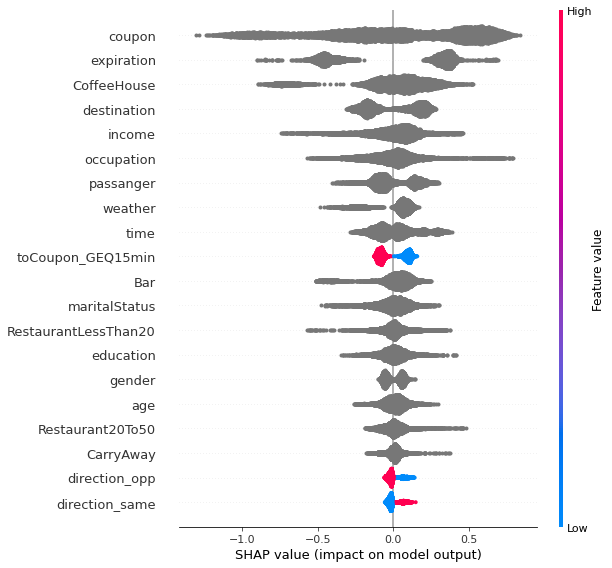

In [17]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

- Самые важные признаки: coupon, expiration, CoffeeHouse.
- Почти все directions_same = 1 находятся в классе 1
- Почти все toCoupoub_GEQ15min = 0 и direction_opp = 0 находятся в классе 1

CatBoost плохо дружит с SHAP при категориальных признаках.

### Задание 6
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [18]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Вероятность купона повысили признаки: рестораны в пределах 20-50 = 1-3, время 6PM. Но понизили то, что предлагался купон именно в ресторан 20-50, действием на 2 часа, водитель имеет определнный доход и в данный момент безработный. Также он предпочитает CoffeeHouse.

In [19]:
shap.force_plot(explainer.expected_value, shap_values[5,:], X_train.iloc[5,:])

Вероятность класса 1 сильно понизило то, что купон предназначался для бара, водитель - студент и бары не посещает.

In [20]:
shap.force_plot(explainer.expected_value, shap_values[20,:], X_train.iloc[20,:])

Наибольшую вероятность определил признак expiration = 1d, снежная погода и пассажиры - дети более остальных снизили вероятность взять купон.

Для топ 1% (не 10, т.к. данных много):

In [25]:
top1 = int(len(shap_values) * 0.01)
shap.force_plot(explainer.expected_value, shap_values[:top1, :], X_train.iloc[:top1, :])

- expiration = 2h имеет большой вклад в определение классом 0
- destination = No urgent Place имеет большой вклад в определение классом 1
- weather = Snowy имеет большой вклад в определение классом 0

Т.е. если идёт снег и купон истекает в течение 2-х часов, то купоном скорее всего не воспользуются. Если водитель не имеет чёткой цели (не едет на работу или домой), то вероятность использования купона велика.